In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.datasets import fetch_openml
import pickle

In [9]:
DATA_PATH = 'C:\\Users\\배진우\\Documents\\multiCampus_TA\\python_data'

# 저장된 mnist 데이터를 읽어온다.
with open(DATA_PATH + 'mnist.pkl', 'rb') as f:
    mnist = pickle.load(f)

In [28]:
# input data를 생성한다
inputX = np.array(mnist['data'][:5000])
imageX = inputX.copy()
# Z-score nomalization.
# 그냥하면 세로 방향으로 표준화한다. 가로 방향으로 표준화하기 위해 transpose 후
# 표준화하고, 결과를 다시 transpose 했다.
sc = StandardScaler()
inputX = sc.fit_transform(inputX.T).T
# Kernel PCA로 차원을 줄인다
pca = KernelPCA(n_components = 50, kernel='rbf')
inputX = pca.fit_transform(inputX)
# K-means++ 알고리즘으로 학습 데이터를 K 그룹으로 분류한다.
km = KMeans(n_clusters=10, init='k-means++', n_init=3, max_iter=300, 
tol=1e-04, random_state=0)
km = km.fit(inputX)
clust = km.predict(inputX)


<Figure size 576x144 with 0 Axes>

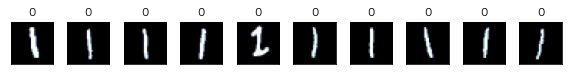

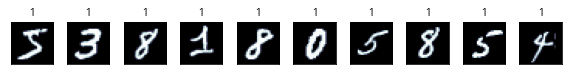

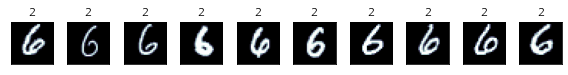

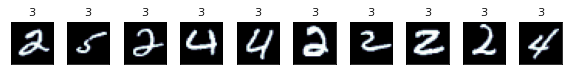

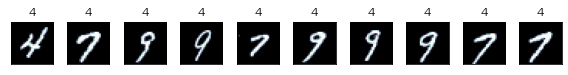

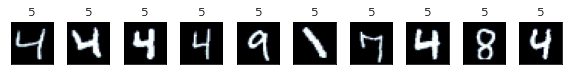

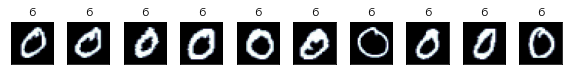

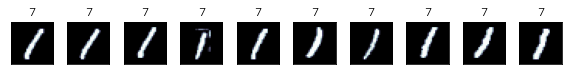

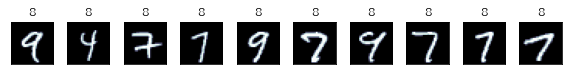

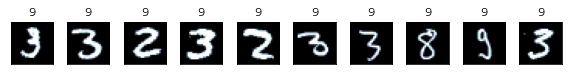

In [29]:
# cluster 별로 이미지를 확인한다.
f = plt.figure(figsize=(8, 2))
for k in np.unique(clust):
    # cluster가 i인 imageX image 10개를 찾는다.
    idx = np.where(clust == k)[0][:10]
    f = plt.figure(figsize=(8, 2))
    for i in range(10):
        image = imageX[idx[i]].reshape(28,28)
        ax = f.add_subplot(1, 10, i + 1)
        ax.imshow(image, cmap=plt.cm.bone)
        ax.grid(False)
        ax.set_title(k)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.tight_layout()
